In [1]:
from keras.layers import Input, Dense
from keras.models import Model, Sequential

In [2]:
# sample weights
np.random.seed(0)
w = 0.5 * np.random.normal(size=(4, 4))
b = np.zeros((4))

In [3]:
np.zeros((4))

array([0., 0., 0., 0.])

In [4]:
np.zeros(4)

array([0., 0., 0., 0.])

In [5]:
model1 = Sequential(name="model1")
model1.add(Dense(4, input_shape=(4,), activation='sigmoid', weights=(w,b), name="dense1"))
type(model1)

keras.engine.sequential.Sequential

In [6]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense1 (Dense)               (None, 4)                 20        
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


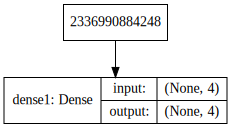

In [8]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model1, show_shapes=True).create(prog='dot', format='svg'))

In [9]:
input_layer2 = Input(shape=(4,), name='input2')
# layer와 layer 연결
hidden_layer2 = Dense(4, activation='sigmoid', weights=(w,b), name="dense2")(input_layer2)
model2 = Model(input_layer2, hidden_layer2, name='model2')
type(model2)

keras.engine.training.Model

In [10]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input2 (InputLayer)          (None, 4)                 0         
_________________________________________________________________
dense2 (Dense)               (None, 4)                 20        
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


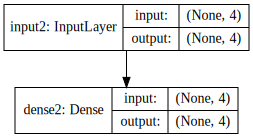

In [11]:
SVG(model_to_dot(model2, show_shapes=True).create(prog='dot', format='svg'))

In [12]:
# model1, input_layer2 결합
model3 = Model(input_layer2, model1(input_layer2), name='model3')
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input2 (InputLayer)          (None, 4)                 0         
_________________________________________________________________
model1 (Sequential)          (None, 4)                 20        
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


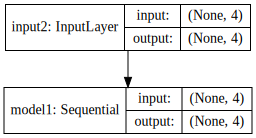

In [13]:
SVG(model_to_dot(model3, show_shapes=True).create(prog='dot', format='svg'))

In [14]:
input_layer4 = Input(shape=(4,), name='input4')
model4 = Model(input_layer4, model2(input_layer4), name='model4')
model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input4 (InputLayer)          (None, 4)                 0         
_________________________________________________________________
model2 (Model)               (None, 4)                 20        
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


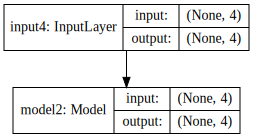

In [15]:
SVG(model_to_dot(model4, show_shapes=True).create(prog='dot', format='svg'))

In [19]:
data = np.ones((1,4))
data

array([[1., 1., 1., 1.]])

In [17]:
y = 1 / (1 + np.exp(-(w.T).dot(data.T)))
y

array([[0.89517384],
       [0.49439434],
       [0.7787448 ],
       [0.87421386]])

In [18]:
model1.predict(data)

array([[0.89517385, 0.49439433, 0.7787448 , 0.8742138 ]], dtype=float32)

In [20]:
model2.predict(data)

array([[0.89517385, 0.49439433, 0.7787448 , 0.8742138 ]], dtype=float32)

In [21]:
model3.predict(data)

array([[0.89517385, 0.49439433, 0.7787448 , 0.8742138 ]], dtype=float32)

In [22]:
model4.predict(data)

array([[0.89517385, 0.49439433, 0.7787448 , 0.8742138 ]], dtype=float32)

##### model끼리 연결하기

In [23]:
input_layer5 = Input(shape=(4,), name="input5")
model5 = Model(input_layer5, model2(model1(input_layer5)), name="model5")
model5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input5 (InputLayer)          (None, 4)                 0         
_________________________________________________________________
model1 (Sequential)          (None, 4)                 20        
_________________________________________________________________
model2 (Model)               (None, 4)                 20        
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


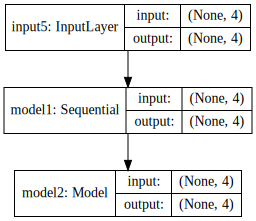

In [24]:
SVG(model_to_dot(model5, show_shapes=True).create(prog='dot', format='svg'))

In [25]:
model5.predict(data)

array([[0.82399994, 0.53757536, 0.71565944, 0.8425977 ]], dtype=float32)

In [26]:
y2 = 1 / (1 + np.exp(-(w.T).dot(y)))
y2.T

array([[0.82399994, 0.5375754 , 0.71565945, 0.84259771]])

sigmoid를 두 번 겪은 결과값